# Title

**Kernel Support Vector Machines**

# Description

The goal of the exercise is to perform classification predictions on a kernel SVM model .

# Instructions: 
- We are trying to predict who will have AHD based on Age and MaxHAR. To do so we need to:
- Read the `Heart.csv` as a data frame and split into train and test.
- Assign the predictor and response variables.
- Fit SVC models with polynomial and gaussian (rbf) kernels 
- Plot the support vectors for both kernels
- Verify the decision function value for both kernels

# Hints:
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC" target="_blank">sklearn.SVM()</a> : Generates a Support Vector Machine classifier

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.fit" target="_blank">sklearn.svm.SVC.fit()</a> : Fits the model to the given data

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.predict" target="_blank">sklearn.svm.SVM.predict()</a> : Predict using the estimated model  to perform pure classification predictions

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.predict_proba" target="_blank">sklearn.svc.SVM().predict_proba()</a> : Predict using the estimated model to perform probability predictions of all the classes in the response (they should add up to 1 for each observation)

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.coef_" target="_blank">sklearn.svm.SVC().coef_ and .intercept_</a> : Pull off the estimated $\beta$ coefficients in a SVC model


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
heart = pd.read_csv('Heart.csv')

# Force the response into a binary indicator:
heart['AHD'] = 1*(heart['AHD'] == "Yes")


print(heart.shape)
heart.describe()

(303, 15)


,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,303.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,0.458746
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,0.499120
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


**Q1.1**: 
- Create the train and test datasets, select Age and MaxHR as the predictors (features).
- Set the degree to 2 for a polynomial transformation and transform the train dataset with this polynomial trnasformation
- Print the names of the features before and after the transformation
- Create a scatter plot of the two features (Age and MaxHR). 
- Train a linear SVC model with the transformed data
- Create the decision boundaries for the SVM with linear kernel


In [3]:
heart_train, heart_test = train_test_split(heart, test_size=0.3, random_state = 109)
degree = 2
predictors = ['Age','MaxHR']

poly = PolynomialFeatures(degree=degree,include_bias=False).fit(heart_train[predictors])
X_train1 = poly.transform(heart_train[predictors])
y_train = np.array(heart_train['AHD'])

In [4]:
X_train1.shape

(212, 5)

In [5]:
print(poly.feature_names_in_)
print(poly.get_feature_names_out())

['Age' 'MaxHR']
['Age' 'MaxHR' 'Age^2' 'Age MaxHR' 'MaxHR^2']


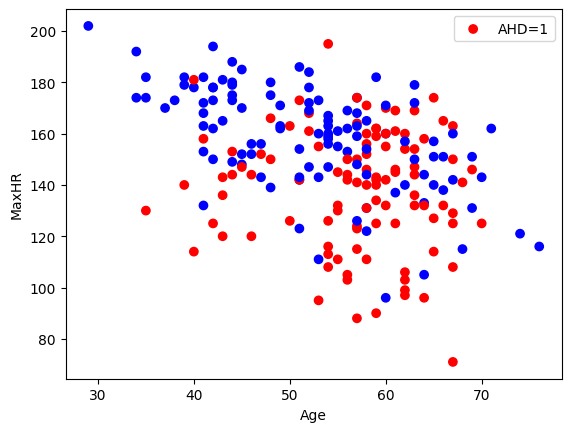

In [6]:
plt.scatter(X_train1[:, 0], X_train1[:, 1], c=y_train, cmap = 'bwr')
plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.legend(['AHD=1']);

In [8]:
# fit the model
svm1 = SVC(kernel='linear')
svm1.fit(X_train1,y_train)


SVC(kernel='linear')

In [9]:
n = 100

x1=np.linspace(np.min(heart[['Age']]),np.max(heart[['Age']]),n)
x2=np.linspace(np.min(heart[['MaxHR']]),np.max(heart[['MaxHR']]),n)
x1v, x2v = np.meshgrid(x1, x2)

# This is how we would typically do the prediction (have a vector of yhats)
#yhat10 = knn10.predict(np.array([x1v.flatten(),x2v.flatten()]).reshape(-1,2))

# To do the predictions and keep the yhats on 2-D (to match the dummy predictor shapes), use this
X = np.c_[x1v.ravel(), x2v.ravel()]
X_dummy = PolynomialFeatures(degree=2,include_bias=False).fit_transform(X)





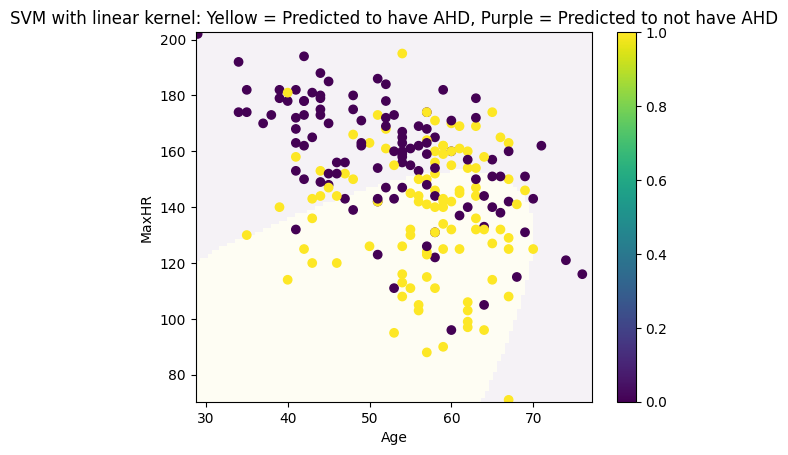

In [10]:
yhat1 = svm1.predict(X_dummy)
plt.pcolormesh(x1v, x2v, yhat1.reshape(x1v.shape),alpha = 0.05) 
plt.scatter(heart_train['Age'],heart_train['MaxHR'],c=heart_train['AHD'])
plt.ylabel("MaxHR")
plt.xlabel("Age")
plt.title("SVM with linear kernel: Yellow = Predicted to have AHD, Purple = Predicted to not have AHD")
plt.colorbar()
plt.show()

**Q1.2**: 
- Select Age and MaxHR as the predictors (features) from the original (not transformed) X_train dataset.
- Train a SVC model with polynomial kernel with C=100, gamma=0.5, degree=2
- Create a scatter plot of dataset for the two predictors as well as the support vectors
- Create the decision boundaries for the SVM with polynomial kernel. Compare the decision boundary
you found for linear kernel and the polynomial kernel


In [19]:
X_train = np.array(heart_train[predictors])
svm_poly = SVC(kernel='poly', C=100, gamma = 0.5, degree=2)
y_poly = np.array(heart_train['AHD'])
svm_poly.fit(X_train, y_poly)


SVC(C=100, degree=2, gamma=0.5, kernel='poly')

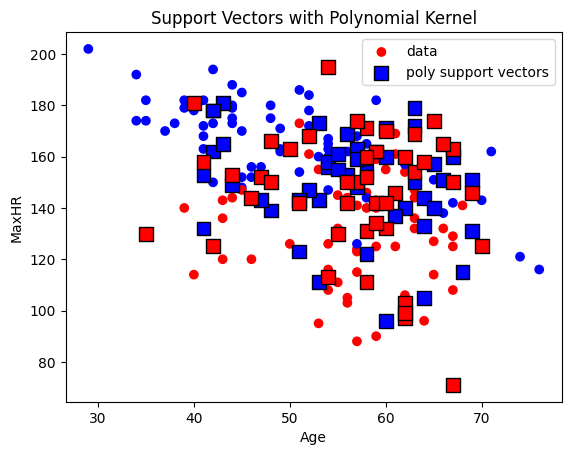

In [20]:
lw = 2
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_poly, cmap='bwr', label='data')

plt.scatter(X_train[svm_poly.support_, 0], X_train[svm_poly.support_, 1], c=y_poly[svm_poly.support_], cmap='bwr',
            facecolors="none", edgecolor="k", marker='s', label='poly support vectors', s=100)

plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.title('Support Vectors with Polynomial Kernel')
plt.legend()
plt.show()

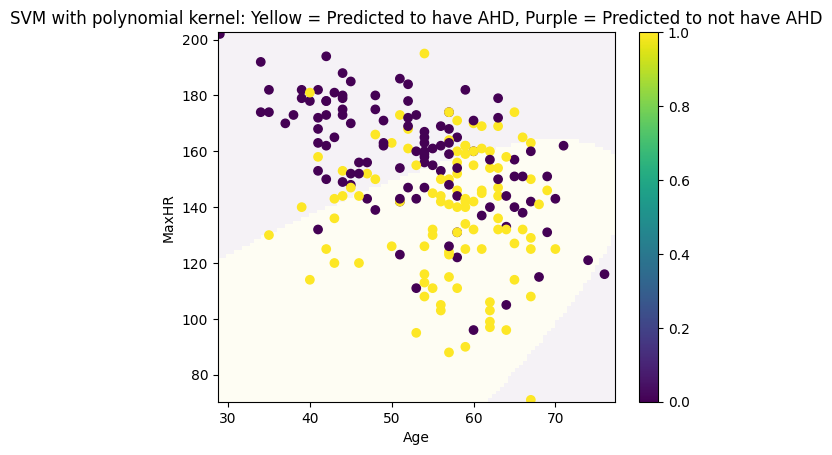

In [21]:
yhat2 = svm_poly.predict(X)
plt.pcolormesh(x1v, x2v, yhat2.reshape(x1v.shape),alpha = 0.05) 
plt.scatter(heart_train['Age'],heart_train['MaxHR'],c=heart_train['AHD'])
plt.ylabel("MaxHR")
plt.xlabel("Age")
plt.title("SVM with polynomial kernel: Yellow = Predicted to have AHD, Purple = Predicted to not have AHD")
plt.colorbar()
plt.show()

In [26]:
from sklearn.svm import SVC

**Q1.3**: 
- Select Age and MaxHR as the predictors (features) from the original (not transformed) X_train dataset.
- Train a SVC model with rbf kernel with C=100, gamma=0.1
- Create a scatter plot of dataset for the two predictors as well as the support vectors
- Create the decision boundaries for the SVM with polynomial kernel. 

In [33]:

predictors = ['Age', 'MaxHR']
X_train = np.array(heart_train[predictors])
y_poly = np.array(heart_train['AHD'])

svm_rbf = SVC(kernel='rbf', C=100, gamma=0.1)
svm_rbf.fit(X_train, y_poly)

y_rbf = svm_rbf.predict(X_train)

print("Predictions with RBF kernel:", y_rbf)

Predictions with RBF kernel: [1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0
 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1
 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1
 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1
 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0]


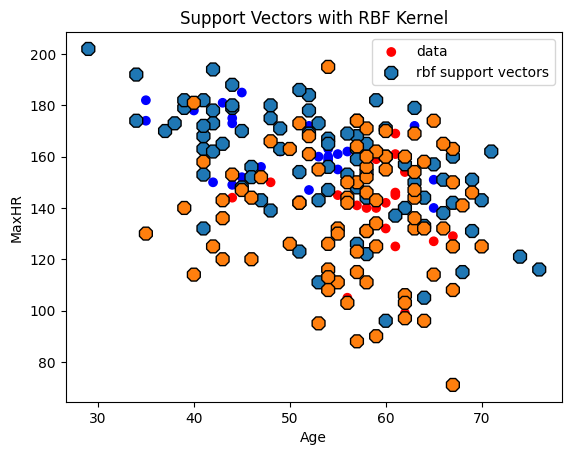

In [36]:
###############################################################################
# look at the results
lw = 2
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', label='data')

#plt.scatter(X_train1[:, 0], X_train1[:, 1], c=plt.cm.tab10(y_rbf), label='RBF model')
#plt.scatter(X_train1[:, 0], X_train1[:, 1], c=plt.cm.tab10(y_poly), label='Polynomial model')

plt.scatter(X_train[svm_rbf.support_, 0], X_train[svm_rbf.support_, 1], c=plt.cm.tab10(y_train[svm_rbf.support_]),
            facecolors="none", edgecolor="k", marker='8', label='rbf support vectors', s=100)

plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.title('Support Vectors with RBF Kernel')
plt.legend()
plt.show()

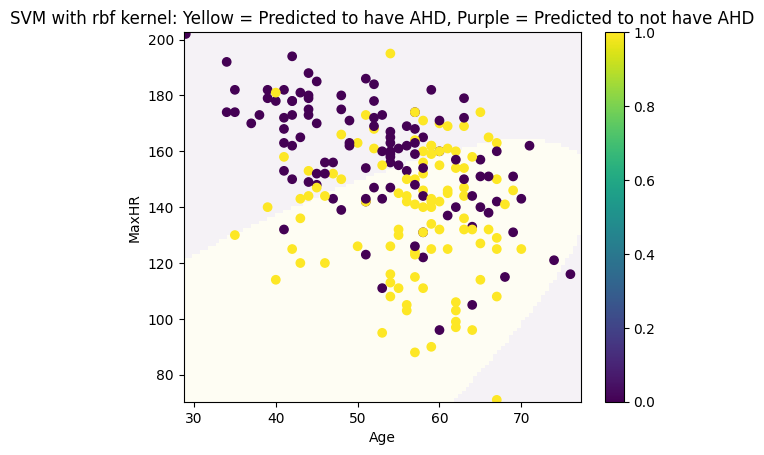

In [ ]:
yhat3 = svm_poly.predict(X)
plt.pcolormesh(x1v, x2v, yhat3.reshape(x1v.shape),alpha = 0.05) 
plt.scatter(heart_train['Age'],heart_train['MaxHR'],c=heart_train['AHD'])
plt.ylabel("MaxHR")
plt.xlabel("Age")
plt.title("SVM with rbf kernel: Yellow = Predicted to have AHD, Purple = Predicted to not have AHD")
plt.colorbar()
plt.show()

**Q1.4**: 
- Print the size of the dual coefficients for the polynomial kernel model
- Pick the first data point from your training dataset and assign it to a new variable called x_new.
- Make sure that x_new has two dimentions (use np.newaxis to add a second dimention to your data point)
- Print the decision function value for x_new using your poly kernel model
- Find the same decision function value for x_new by using the formula: $\sum_{i=1}^K \alpha_i(\gamma x_i^Tx_{new})^2$, where K is the number of supoort vectors, i is the ith support vector, $\alpha_i$ is the coefficient for the ith support vector, $\gamma$ is the coefficient of the inner product between the support vector and x_new.

In [41]:
print(svm_poly.dual_coef_.shape)

(1, 91)


In [42]:
x_new=X_train[0,:]
x_new= x_new[np.newaxis,...]

In [43]:
print(svm_poly.decision_function(x_new))

[4747.53365446]


In [44]:
from sklearn.metrics.pairwise import polynomial_kernel
np.dot(svm_poly.dual_coef_,polynomial_kernel(X_train[svm_poly.support_],\
                                             x_new, degree=2, gamma=0.5, coef0=0))+svm_poly.intercept_

array([[4747.5336621]])

**Q1.5**: 
- Print the size of the dual coefficients for the rbf kernel model
- Pick the first data point from your training dataset and assign it to a new variable called x_new.
- Make sure that x_new has two dimentions (use np.newaxis to add a second dimention to your data point)
- Print the decision function value for x_new using your rbf kernel model
- Find the same decision function value for x_new by using the formula: $\sum_{i=1}^K  \alpha_i exp(-\gamma ||x-x_{new}||^2)$, where K is the number of supoort vectors, i is the ith support vector, $\alpha_i$ is the coefficient for the ith support vector, $\gamma$ is the regularization coefficient for the rbf kernel.

In [45]:
print(svm_rbf.dual_coef_.shape)

(1, 163)


In [46]:
x_new=X_train[0,:]
x_new= x_new[np.newaxis,...]

In [47]:
print(svm_rbf.dual_coef_.shape)

(1, 163)


In [ ]:
from sklearn.metrics.pairwise import rbf_kernel
np.dot(svm_rbf.dual_coef_, X_train[svm_rbf.support_], x_new, gamma=0.1))+svm_rbf.intercept_

array([[0.99984873]])

In [52]:
from sklearn.metrics.pairwise import rbf_kernel

In [53]:
np.dot(svm_rbf.dual_coef_, rbf_kernel(X_train[svm_rbf.support_], x_new, gamma=0.1))+svm_rbf.intercept_

array([[1.00005781]])